<a href="https://colab.research.google.com/github/Awipib/aml_2019_group10/blob/master/gd_pv_camel_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the plain vanilla Gradient Descent
The function that we chose to find its minimum, is the Six-Hump Camel.

![alt text](https://www.sfu.ca/~ssurjano/camel62.png)


This function has two global minimum: 

![alt text](https://www.sfu.ca/~ssurjano/camel63.png)

In [0]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits import mplot3d

from ipywidgets import interact,interactive, fixed, interact_manual
import ipywidgets as widget
from IPython.display import HTML
from matplotlib import animation, rc

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/AML/Projects/GD_v1

/content/gdrive/My Drive/AML/Projects/GD_v1


**Importing the class**

Here we import our class and test the **Plain Vanilla Gradient Descent**. 
Our starting point is x(1,1) and the hyper-parameter eta was set to 0.029.

The speed is the number of iterations it took to converge and as we can see it took 36 iterations. 
The minimum that it found is at x(-0.08957, 0.7126), f(x)=-1.0316

In [0]:
import gd

In [0]:
n_iter=500
starting_pt=[1.,1.]
eta=0.029
tol=1e-5

gdpv=gd.gdcls()
result=gdpv.gd_pv_result(n_iter,starting_pt,eta,tol)

In [0]:
result['speed']

36

In [0]:
result['x_op']

[-0.08957033172191721, 0.7126251425525605]

In [0]:
result['min_value']

-1.0316281662051348

# Plot x path
We plotted the trajectories of x1 and x2. In the first 2 graphs we used the full path and in the second 2 graphs we started plotting after the first step to have a more detailed inspection.



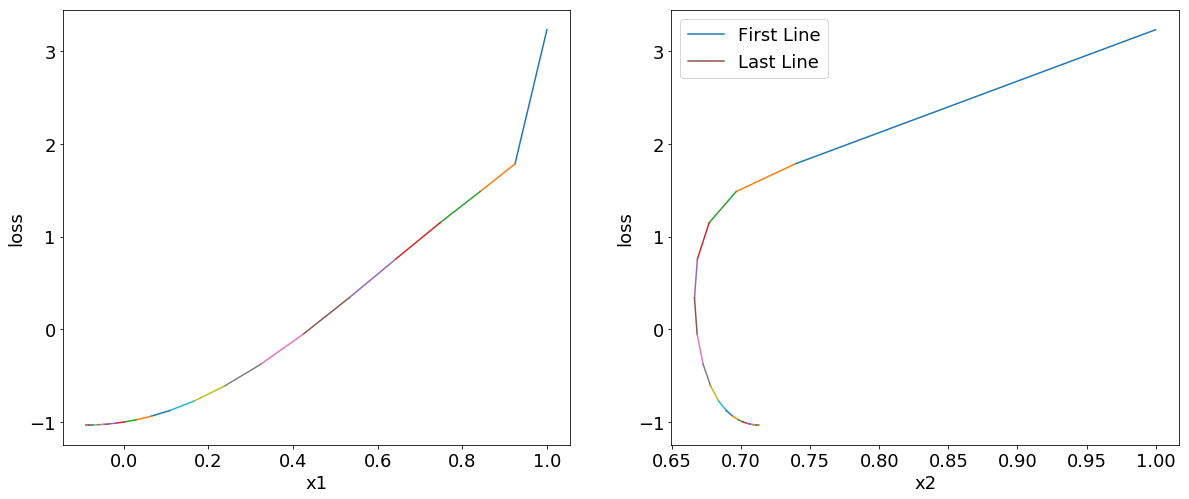

In [0]:
gdpv.plot2Dpath(0)

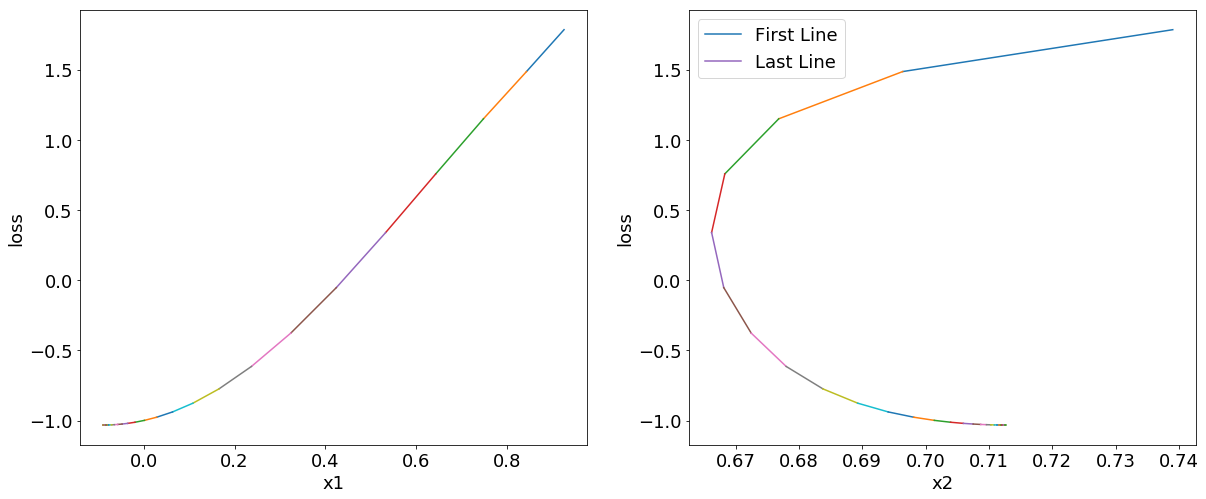

In [0]:
gdpv.plot2Dpath(1)

#  3D path
Here, we created animated 3D graphs that show the path of the **Plain Vanilla Gradient Descent** optimization for different values of eta.

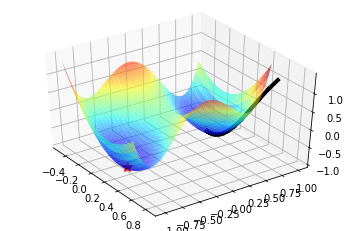

In [0]:
#x1 = np.linspace(-0.2, 0.1, 50)
#x2 = np.linspace(0.6, 0.9 ,50)

x1 = np.linspace(-0.5, 0.5, 50)
x2 = np.linspace(-1, 1 ,50)

#x1 = np.linspace(-0.02, 0.15, 20)
#x2 = np.linspace(-0.85,- 0.4 ,20)

x1, x2 = np.meshgrid(x1, x2)

t1=(4-2.1*x1**2+x1**4/3)*x1**2
t2=x1*x2
t3=(-4+4*x2**2)*x2**2
z = t1+t2+t3



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.6, linewidth=0)
#ax.plot_wireframe(x1,x2, z, color='grey')
ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)


x1p=result['x1_path']
x2p=result['x2_path']
zp=result['min_value_path']
n=len(zp)
for i in np.arange(2,n-1):
    ax.plot([x1p[i], x1p[i+1]], [x2p[i],x2p[i+1]],[zp[i],zp[i+1]],'black',linewidth=4)
ax.view_init(40, -35) #first set
#ax.view_init(30, 190) #2nd set




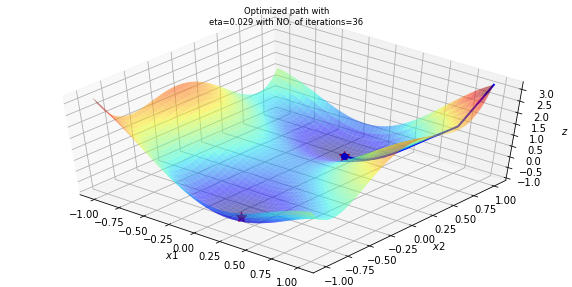

In [0]:
gdpv.gd_anim('pv')

In [0]:
n_iter=100
starting_pt=[1.,1.]
tol=1e-5

speed=[]
min_value=[]
x_op=[]
index_eta=[]
x_path=[]
min_path=[]
range_eta=np.arange(0.01,0.035,0.002)

for ii in range_eta:
        eta=ii
      
        result_opt=gdpv.gd_pv_result(n_iter,starting_pt,eta,tol)
        speed.append(result_opt['speed'])
        min_value.append(result_opt['min_value'])
        x_op.append(result_opt['x_op'])
        x_path.append(result_opt['x_path'])
        min_path.append(result_opt['min_value_path'])

In [0]:
range_eta[np.argmin(speed)]

0.034

In [0]:
min(speed)

30

In [0]:
def f(eta):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection='3d', elev=60, azim=-50)
    x1 = np.linspace(-2,2, 50)
    x2 = np.linspace(-3,3 ,50)
    x1, x2 = np.meshgrid(x1, x2)
    t1=(4-2.1*x1**2+x1**4/3)*x1**2
    t2=x1*x2
    t3=(-4+4*x2**2)*x2**2
    z = t1+t2+t3

    ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.5, linewidth=0)
    ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)
    ax.plot([-0.0898],[0.7126],[-1.0316],'r*', markersize=10)
    
    x1p=np.array(x_path[list(range_eta).index(eta)])[:,0]
    x2p=np.array(x_path[list(range_eta).index(eta)])[:,1]
    zp=np.array(min_path[list(range_eta).index(eta)])
    speedp=np.array(speed[list(range_eta).index(eta)])
    
    
    ledg='eta='+str(eta)+' and NO. of iterations='+str(speedp)  
    line, = ax.plot([], [], 'b', lw=2,label=ledg)
    point, = ax.plot([], [], 'bo')

    
    
    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point
    def animate(i):
        line.set_data(x1p[:i], x2p[:i])
        line.set_3d_properties(zp[:i])
        point.set_data(x1p[i-1:i], x2p[i-1:i])
        point.set_3d_properties(zp[i-1:i])
        return line, point
    
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.array(x1p).shape[0], interval=200, 
                               repeat_delay=1,repeat=True, blit=True)
    ax.set_xlabel('$x1$')
    ax.set_ylabel('$x2$')
    ax.set_zlabel('$z$')
    ax.set_title('Optimized path with'+'\n'+ledg,fontsize='small')
    HTML(anim.to_html5_video())
    rc('animation', html='html5')
    return anim
        
interact(f,eta=(range_eta))
#interact(f,eta=(min(range_eta),max(range_eta),range_eta[1]-range_eta[0]))
         


interactive(children=(Dropdown(description='eta', options=(0.01, 0.012, 0.014, 0.016, 0.018000000000000002, 0.…

<function __main__.f>

# Experiment on step sizes
Finally, we experimented with different values of the eta parameter in the range of (0.01 - 0.15) in order to find the one that needs the least iterations to converge.

As it is demonstrated from the last graph the optimal value for eta is 0.082.

In [0]:
eta=np.linspace(0.01, 0.15, 100)
sp=[]
min_v=[]
for i in eta:
    result=gdpv.gd_pv_result(n_iter,starting_pt,i,tol)
    sp.append(result['speed'])
    min_v.append(result['min_value'])
# column=beta,row=eta
sp=np.asarray(sp)
min_v=np.asarray(min_v)

Text(0, 0.5, 'NO. of iteration')

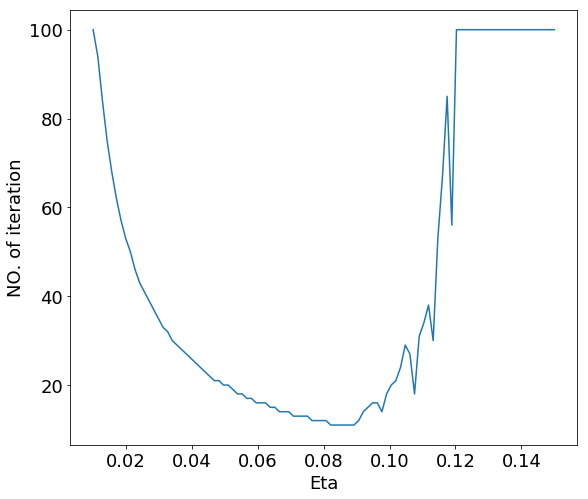

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(eta, sp) 
ax1.set_xlabel('Eta')
ax1.set_ylabel('NO. of iteration')

In [0]:
eta[np.argmin(sp)]

0.08212121212121211

In [0]:
min(sp)

11